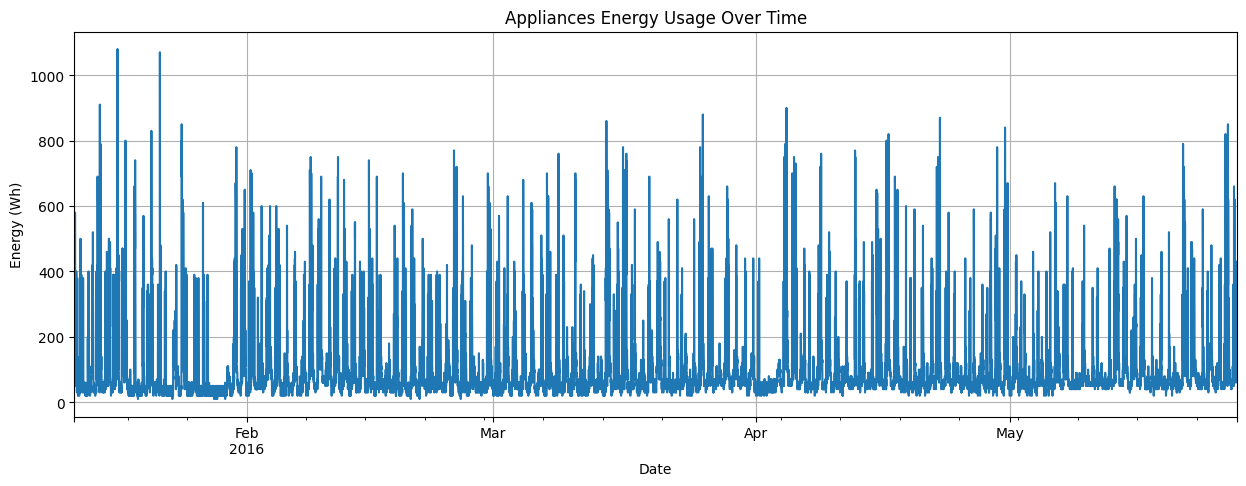

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('../data/processed_data.csv', parse_dates=['date'])
df.set_index('date', inplace=True)
# print(df.head())
# print(df.info())

plt.figure(figsize=(15, 5))
df['Appliances'].plot()
plt.title('Appliances Energy Usage Over Time')
plt.xlabel('Date')
plt.ylabel('Energy (Wh)')
plt.grid(True)
plt.show()

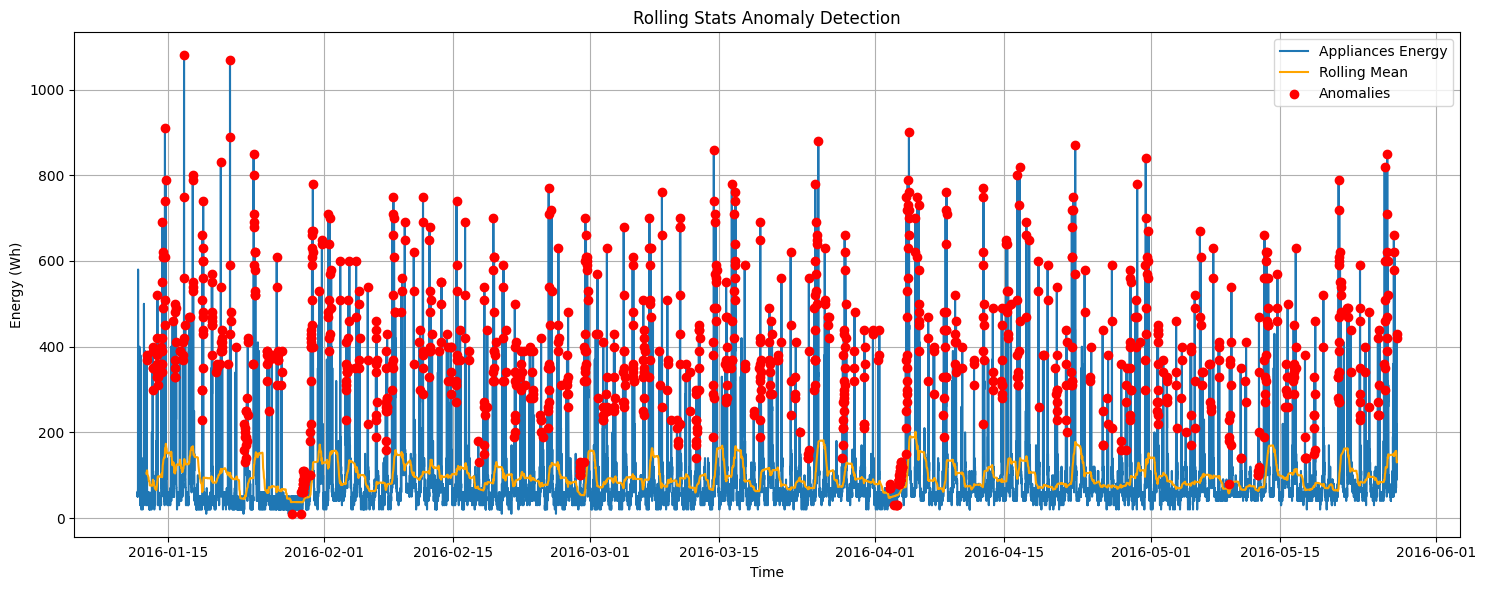

In [4]:
window = 144
threshold = 2

rolling_mean = df['Appliances'].rolling(window).mean()
rolling_std = df['Appliances'].rolling(window).std()
# print(rolling_mean)
# print(rolling_std)
# print(df['Appliances'] - rolling_mean)
df['anomaly_rolling'] = (np.abs(df['Appliances'] - rolling_mean) > (threshold * rolling_std))

plt.figure(figsize=(15, 6))
plt.plot(df.index, df['Appliances'], label='Appliances Energy')
plt.plot(df.index, rolling_mean, color='orange', label='Rolling Mean')
plt.scatter(df.index[df['anomaly_rolling']],
            df['Appliances'][df['anomaly_rolling']],
            color='red', label='Anomalies', zorder=5)
plt.title('Rolling Stats Anomaly Detection')
plt.xlabel('Time')
plt.ylabel('Energy (Wh)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


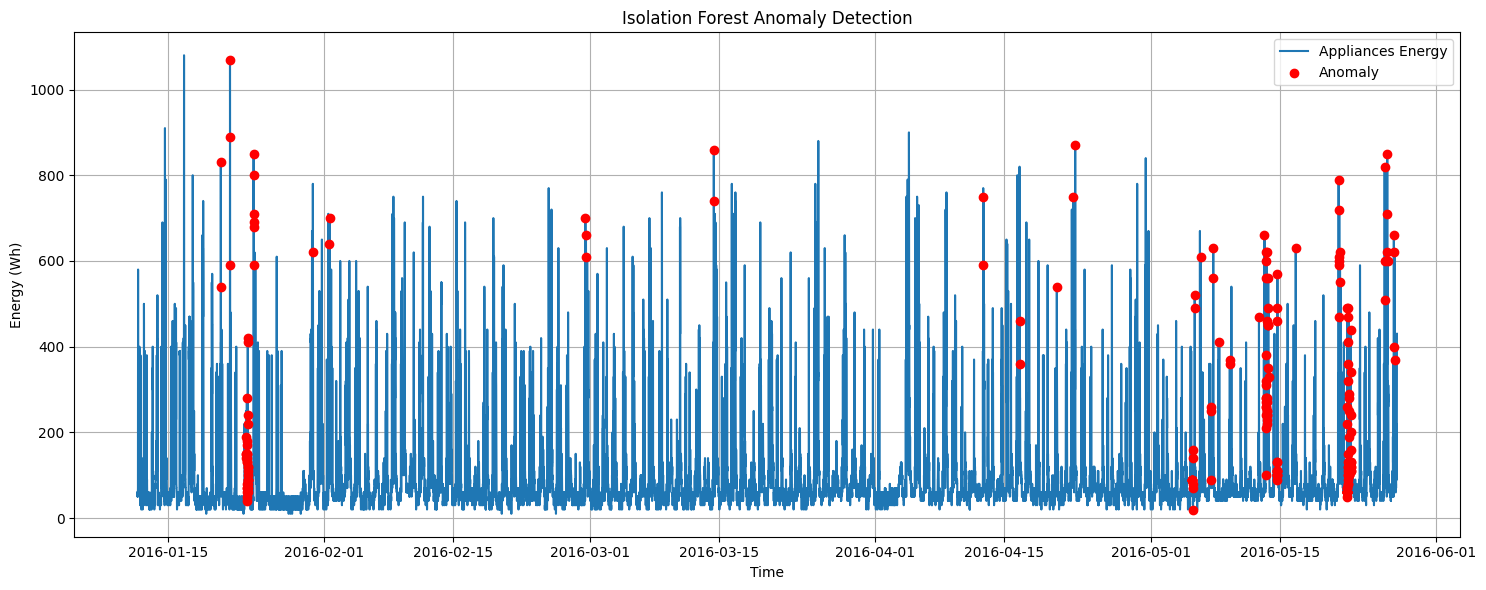

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest

# Select features (Appliances + environmental sensors)
features = ['Appliances', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3']
df_model = df[features].dropna()

# Scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_model)

# Create and fit model
iso_forest = IsolationForest(contamination=0.01, random_state=42)
df_model['anomaly_iforest'] = iso_forest.fit_predict(X_scaled)

# Map: -1 = anomaly, 1 = normal
df_model['anomaly_iforest'] = df_model['anomaly_iforest'].map({1: 0, -1: 1})

plt.figure(figsize=(15, 6))
plt.plot(df_model.index, df_model['Appliances'], label='Appliances Energy')
plt.scatter(df_model.index[df_model['anomaly_iforest'] == 1],
            df_model['Appliances'][df_model['anomaly_iforest'] == 1],
            color='red', label='Anomaly', zorder=5)
plt.title('Isolation Forest Anomaly Detection')
plt.xlabel('Time')
plt.ylabel('Energy (Wh)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



In [6]:
from sklearn.model_selection import train_test_split

# Reuse scaled data
X_train, X_test = train_test_split(X_scaled, test_size=0.2, random_state=42)

In [11]:
# from tensorflow.keras.models import Model
# from tensorflow.keras.layers import Input, Dense
# from tensorflow.keras import regularizers
#
# # Input shape
# input_dim = X_train.shape[1]
#
# # Define model
# input_layer = Input(shape=(input_dim,))
# encoded = Dense(32, activation="relu")(input_layer)
# encoded = Dense(16, activation="relu")(encoded)
# decoded = Dense(32, activation="relu")(encoded)
# decoded = Dense(input_dim, activation="linear")(decoded)
#
# autoencoder = Model(inputs=input_layer, outputs=decoded)
# autoencoder.compile(optimizer='adam', loss='mse')


ModuleNotFoundError: No module named 'tensorflow.python'

In [8]:
# history = autoencoder.fit(X_train, X_train,
#                           epochs=50,
#                           batch_size=32,
#                           validation_data=(X_test, X_test),
#                           shuffle=True)


In [9]:
# # Reconstruct test data
# X_pred = autoencoder.predict(X_test)
# mse = np.mean(np.power(X_test - X_pred, 2), axis=1)
#
# # Set threshold (e.g., 95th percentile)
# threshold = np.percentile(mse, 95)
#
# # Predict anomalies
# anomaly_labels = (mse > threshold).astype(int)


In [10]:
# plt.figure(figsize=(10, 4))
# plt.hist(mse, bins=50)
# plt.axvline(threshold, color='red', linestyle='--', label='Threshold')
# plt.title('Reconstruction Error (Autoencoder)')
# plt.xlabel('MSE')
# plt.ylabel('Count')
# plt.legend()
# plt.grid(True)
# plt.tight_layout()
# plt.show()